# q2:Template Matching

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random 

Text(0.5, 1.0, 'Template')

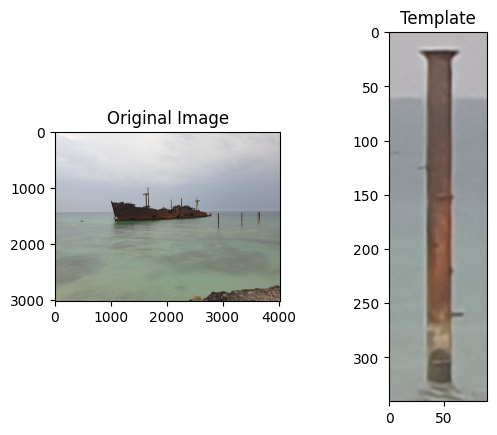

In [3]:
# reading image
original_img = cv2.imread("Greek-ship.jpg")
original_img = cv2.cvtColor(original_img ,cv2.COLOR_BGR2RGB)
template = cv2.imread("patch.png")
template = cv2.cvtColor(template ,cv2.COLOR_BGR2RGB)
# plotting images
plt.subplot(121)
plt.imshow(original_img)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(template)
plt.title("Template")

First I performe edge detection with Canny filter.

In [13]:
def edge_detect(image): 
    gray_scale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img_blur = cv2.GaussianBlur(gray_scale, (5, 5), 0)
    result = cv2.Canny(img_blur, 100,500)
    return result

def edge_amp1(image):
    w, l = image.shape
    h = 30 
    Th = 10
    res = np.zeros(shape = (w, l))
    for i in range(w):
        for j in range(l-h-1): 
            b = False
            for k in range(h):
                if image[i,j-k] > Th:
                    b = True
            a = False
            for k in range(h):
                if image[i,j+k] > Th: 
                    a = True        
            if b==True & a==True:
                res[i, j] = 255
    return res
def edge_amp2(img_input):
    img = img_input.copy()
    w,l,d=img.shape
    res = np.zeros(shape=(w, l))
    for i in range(w):
        for j in range(l):
            r = (img[i, j, 0]>0)&(img[i, j, 0]<180)
            g = (img[i, j, 1]>0)&(img[i, j, 1]<140)
            b = (img[i, j, 2]>0)&(img[i, j, 2]<110)
            if r&g&b:
                res[i, j] = 255
    return res

After edge detecting we perform template matching

In [19]:
def template_matching(img_org,img_tmp):    
    pixels = [(i, j) for i in range(10,2600,100) for j in range(100,3800,100)]
    pixels_len = int(np.ceil((2600-10)/100) * np.ceil((3800-100) /100))
    w1, l1 = img_tmp.shape
    l2 = np.min((60, l1))
    w2 = np.min((350, w1))
    img_tmp_center = img_tmp[int(w1/2 - w2/2):int(w1/2 + w2/2), int(l1/2 - l2/2):int(l1/2 + l2/2)]
    best_x = 0
    best_y = 0 
    score = 0 
    best_img = 0 
    result = []
    for i in range(np.min((pixels_len,100000))):
        indx = random.randint(0, pixels_len - i - 1)
        pixel = pixels.pop(indx)
        pixel_x = pixel[0]
        pixel_y = pixel[1]
        img = img_org[pixel_x:pixel_x+w2, pixel_y:pixel_y+l2]
        score = np.sum((img - img_tmp_center) ** 2)
        if score <410000000:
            x = int(pixel_x - w1/2 + w2/2)
            y = int(pixel_y - l1/2 + l2/2)
            result.append((x, y, score))
        if score <1.19*410000000:
            for i in range(1,100,10):
                for j in range(1, 100,10):
                    x = pixel_x + i
                    y = pixel_y + j 
                    img = img_org[x : x + w2, y : y + l2]
                    score = np.sum((img - img_tmp_center)**2)
                    if score <410000000:
                        x = int(x - w1/2 + w2/2)
                        y = int(y - l1/2 + l2/2)
                        result.append((x, y, score))
    return result  
def rect(result,img_org,img_tmp):
    w = img_tmp.shape[0]
    l = img_tmp.shape[1]
    result.sort(key=lambda x:x[2])
    img = img_org.copy()
    added_recs = []
    for pic in result: 
        disagree = False
        x = pic[0]
        y = pic[1]
        score = pic[2]
        if (y < 1585) & (y > 1545):
            for rec in added_recs:
                if (np.abs(rec[0] -x)<400)&(np.abs(rec[1]-y)<5):
                    disagree=True
        else:
            for rec in added_recs:
                if (np.abs(rec[0] -x)<400)&(np.abs(rec[1] -y)<20):
                    disagree = True
        if not disagree: 
            cv2.rectangle(img,(y, x),(y + l, x + w),(0,0,0),4)
            added_recs.append((x, y))
    return img

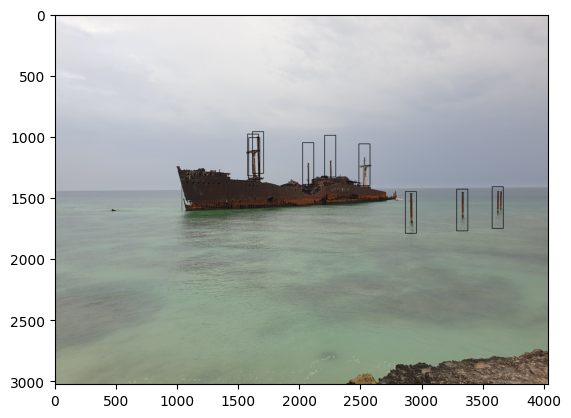

In [20]:
img1=edge_amp2(original_img)
img2=edge_amp2(template)
w,l=img2.shape
result = template_matching(img1, img2)
res = rect(result,original_img,template)
plt.imshow(res)

In [21]:
cv2.imwrite('result11.jpg',cv2.cvtColor(res,cv2.COLOR_RGB2BGR))

True